In [5]:
import numpy as np
from sklearn.decomposition import PCA
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

In [6]:
def test1():
    points = Points([[0, 0, 0], [1, 3, 5], [-5, 6, 3], [3, 6, 7], [-2, 6, 7]])

    plane = Plane.best_fit(points)

    plot_3d(
        points.plotter(c='k', s=50, depthshade=False),
        plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )

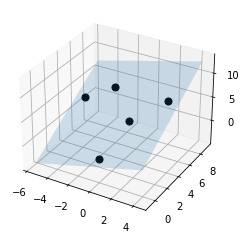

In [7]:
test1()

In [8]:
def test2():
    points = Points([[1, 0, 2], [1.1, 0, 5.3], [1.3, 0, 7], [2, 0, 7.2], [-1, 0, 0]])

    plane = Plane.best_fit(points)

    plot_3d(
        points.plotter(c='k', s=50, depthshade=False),
        plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )


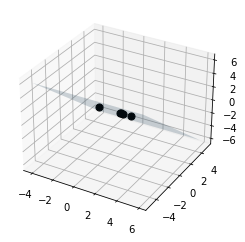

In [9]:
test2()

In [10]:
def test3():
    points = Points([[1, 2, 2], [1.1, 2, 5.3], [1.3, 2, 7], [2, 0, 7.2], [-1, 0, 0]])

    plane = Plane.best_fit(points)

    plot_3d(
        points.plotter(c='k', s=50, depthshade=False),
        plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )

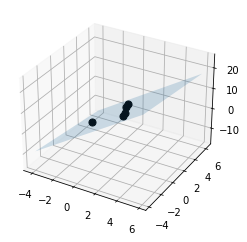

In [11]:
test3()

In [12]:
def test4():
    data = [[1, 2, 2], [1.1, 2, 5.3], [1.3, 2, 7], [2, 0, 7.2], [-1, 0, 0]]
    points = Points(data)
    data = np.array(data)

    m = np.mean(data, axis=0)

    pca = PCA(n_components=3)
    pca.fit(data)

    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

    ev = pca.components_
    print(ev)

    plane = Plane.from_vectors(m, ev[0], ev[1])

    plot_3d(
        points.plotter(c='k', s=50, depthshade=False),
        plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )

    cartesian = plane.cartesian()
    a = cartesian[0]
    b = cartesian[1]
    c = cartesian[2]
    d = cartesian[3]
    D = np.sqrt(a ** 2 + b ** 2 + c ** 2)
    cosTheta = c / D
    sinTheta = np.sqrt(a ** 2 + b ** 2) / D
    u1 = b / D
    u2 = -a / D

    rotMatrix = [[cosTheta + u1 ** 2 * (1 - cosTheta), u1 * u2 * (1 - cosTheta), u2 * sinTheta],
                 [u1 * u2 * (1 - cosTheta), cosTheta + u2 ** 2 * (1 - cosTheta), u1 * sinTheta],
                 [-u2 * sinTheta, u1 * sinTheta, cosTheta]]
    rotMatrix = np.array(rotMatrix)

    newPoints = data @ rotMatrix
    newPoints = Points(newPoints)
    newPlane = Plane.best_fit(newPoints)

    plot_3d(
        newPoints.plotter(c='k', s=50, depthshade=False),
        newPlane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )

    print(cartesian)

[0.88729317 0.09259198 0.02011485]
[6.68116343 2.15826719 1.00595131]
[[-0.30079165 -0.07828025 -0.95047177]
 [-0.13753642 -0.98264669  0.12445571]
 [ 0.94372036 -0.16815972 -0.28480553]]
(-0.943720358895221, 0.1681597233102734, 0.2848055330622772, -0.5959815443123253)


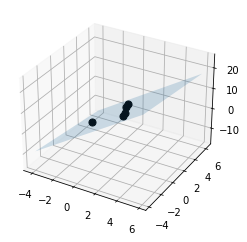

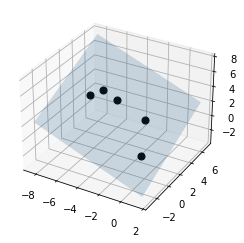

In [13]:
test4()

In [14]:
def test5():
    data = [[1, 1, 2], [1, -1, 2], [1, 2, 4], [1, -2, 4], [2, 2, 2]]
    points = Points(data)
    data = np.array(data)

    m = np.mean(data, axis=0)

    pca = PCA(n_components=3)
    pca.fit(data)

    ev = pca.components_

    plane = Plane.from_vectors(m, ev[0], ev[1])

    cartesian = plane.cartesian()
    print("cartesian orig: ", cartesian)
    a = cartesian[0]
    b = cartesian[1]
    c = cartesian[2]
    d = cartesian[3]

    D = np.sqrt(a ** 2 + b ** 2 + c ** 2)

    cosTheta = c / D
    sinTheta = np.sqrt(a ** 2 + b ** 2) / D
    u1 = b / D
    u2 = -a / D

    rotMatrix = [[cosTheta + u1 ** 2 * (1 - cosTheta), u1 * u2 * (1 - cosTheta), u2 * sinTheta],
                 [u1 * u2 * (1 - cosTheta), cosTheta + u2 ** 2 * (1 - cosTheta), -u1 * sinTheta],
                 [-u2 * sinTheta, u1 * sinTheta, cosTheta]]
    rotMatrix = np.array(rotMatrix)

    if np.abs(c) > 0:
        N = len(data)
        for i in range(N):
            data[i, 2] = data[i, 2] - d / c

    newPoints = data @ rotMatrix.T
    # newPoints[:, 2] = newPoints[:, 2] - d / c
    newPoints = Points(newPoints)
    newPlane = Plane.best_fit(newPoints)

    plot_3d(
        newPoints.plotter(c='k', s=50, depthshade=False),
        newPlane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )

cartesian orig:  (-0.9838942599919053, 0.10590228422741413, -0.14400274771821836, 1.541519891910332)


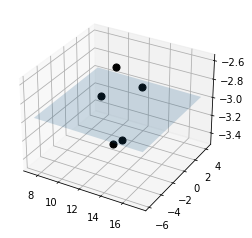

In [15]:
test5()

In [16]:
def test6():
    data = [[1, 2, 2], [1.1, 2, 5.3], [1.3, 2, 7], [2, 0, 7.2], [-1, 0, 0]]
    points = Points(data)
    data = np.array(data)

    m = np.mean(data, axis=0)

    pca = PCA(n_components=3)
    pca.fit(data)

    ev = pca.components_

    plane = Plane.from_vectors(m, ev[0], ev[1])

    cartesian = plane.cartesian()
    a = cartesian[0]
    b = cartesian[1]
    c = cartesian[2]
    d = cartesian[3]

    p1 = [-d / a, 0, 0]
    p2 = [0, -d / b, 0]
    p3 = [0, 0, -d / c]

    plane = Plane.from_points(p1, p2, p3)

    plot_3d(
        points.plotter(c='k', s=50, depthshade=False),
        plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    )

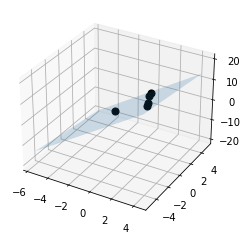

In [17]:
test6()